In [2]:
# To view Model Summary
!pip install -q torchinfo

In [3]:
import torch
from torchvision import datasets, transforms

# Load the Fashion MNIST dataset (without Normlization)
dataset = datasets.FashionMNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())

# Stack all images into a single tensor and compute mean and std
all_pixels = torch.cat([img.view(-1) for img, _ in dataset])
mean = all_pixels.mean().item()
std = all_pixels.std().item()

print(f"Mean: {mean:.4f}, Std: {std:.4f}")

100%|██████████| 26.4M/26.4M [01:21<00:00, 323kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 179kB/s]
100%|██████████| 4.42M/4.42M [00:08<00:00, 510kB/s] 
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


Mean: 0.2860, Std: 0.3530


In [4]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import random
import time

%matplotlib inline

In [5]:
# Set a seed for reproducibility
def set_seeds():
    # Set random seed values
    SEED_VALUE = 42

    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    torch.manual_seed(SEED_VALUE)

    # Fix seed to make training deterministic
    if torch.cuda.is_available():
        torch.cuda.manual_seed(SEED_VALUE)
        torch.cuda.manual_seed_all(SEED_VALUE)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = True

set_seeds()

In [8]:
# Download the training set without normalization
# transforms.Compose() <-- chains together a sequence of transformations
raw_transform = transforms.Compose([transforms.ToTensor()])
train_set_raw = datasets.FashionMNIST(root = './F_MNIST_data', download = True, train = True, transform = raw_transform)

# Compute mean and std from training set
all_pixels = torch.cat([img.view(-1) for img, _ in train_set_raw])
mean = all_pixels.mean().item()
std = all_pixels.std().item()

print(f"Computed Mean: {mean:.4f}, Computed Std: {std:.4f}")

Computed Mean: 0.2860, Computed Std: 0.3530


In [9]:
# Define the new transform using computed mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

# Reload datasets with proper normalization
train_set = datasets.FashionMNIST(root = "F_MNIST_data", download = True, train = True, transform = transform)
val_set = datasets.FashionMNIST(root = "F_MNIST_data", download = True, train = False, transform = transform)

print("Total Train Images:", len(train_set))
print("Total Val Images:", len(val_set))

Total Train Images: 60000
Total Val Images: 10000


In [10]:
# We shuffle the train dataset to avoid the MLP network from learning the sequence pattern in the dataset
train_loader = torch.utils.data.DataLoader(train_set, shuffle = True, batch_size = 64)
val_loader = torch.utils.data.DataLoader(val_set, shuffle = False, batch_size = 64)

In [11]:
# class to idx mapping
class_mapping = {
    0: "Tshirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

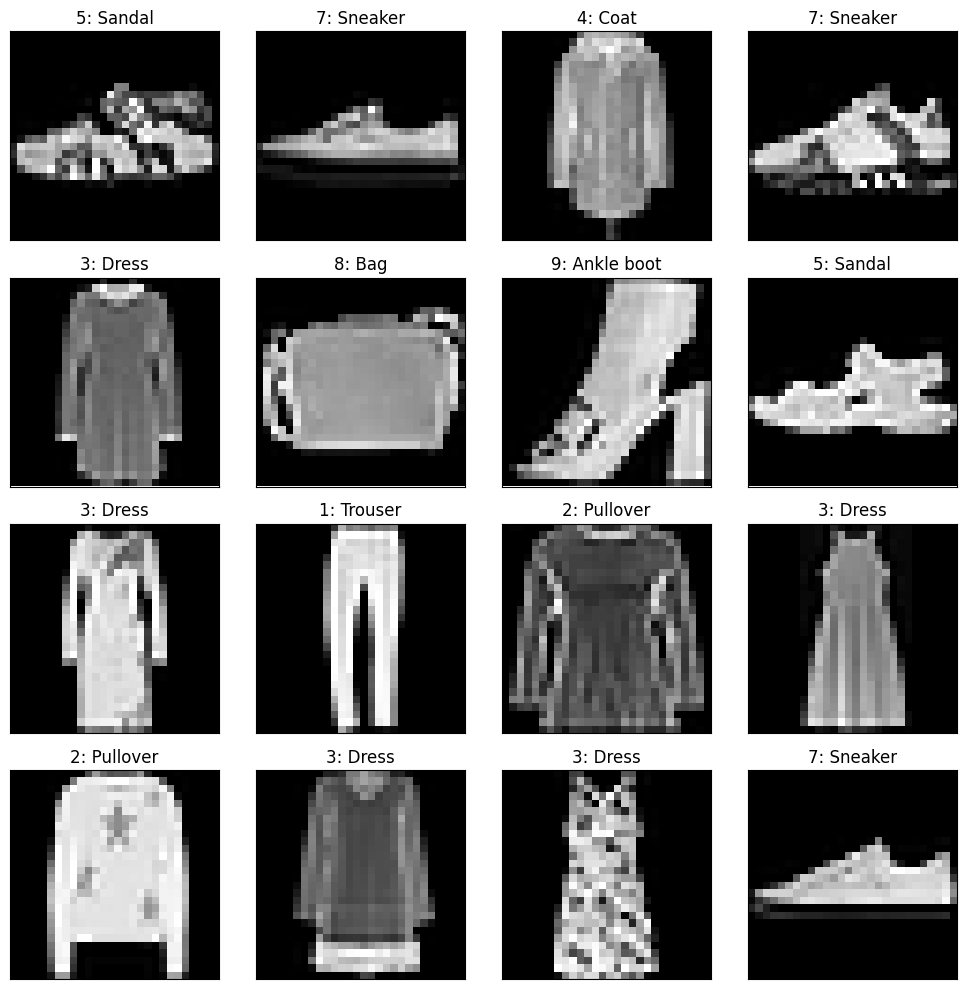

In [12]:
# Dataset visualization
def visualize_images(trainloader, num_images = 20):
    fig = plt.figure(figsize = (10, 10))

    # Iterate over the first batch
    images, labels = next(iter(trainloader))

    # To calculate the number of rows and columns for subplots
    num_rows = 4
    num_cols = int(np.ceil(num_images / num_rows))

    for idx in range(min(num_images, len(images))):
        image, label = images[idx], labels[idx]

        ax = fig.add_subplot(num_rows, num_cols, idx + 1, xticks = [], yticks = [])
        ax.imshow(np.squeeze(image), cmap = "gray")
        ax.set_title(f"{label.item()}: {class_mapping[label.item()]}")

    fig.tight_layout()
    plt.show()

visualize_images(train_loader, num_images = 16)